In [2]:
import os
from urllib.request import urlretrieve
import pandas as pd

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    
    # force_download or
    # if the file does not exist in directory, retrieve
    if force_download or not os.path.exists(filename):
        urlretrieve(URL, filename)
        
    # otherwise, load in data as a pandas dataframe
    # format the dataframe
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns = ['West', 'East'] # rename the columns
    data['Total'] = data['West'] + data['East'] # combine columns
    return data # this will return the formatted dataframe outside the function

In [1]:
from urllib.request import urlretrieve

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

# You can now download the data from the database
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x1f45242b320>)

In [36]:
!head Fremont.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col="Date", parse_dates=True)
data.head()


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


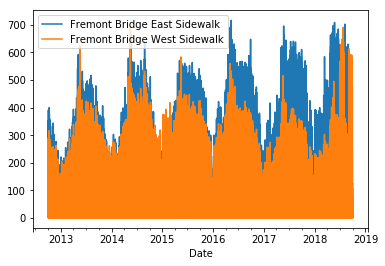

In [14]:
%matplotlib inline
data.plot()

In [15]:
%autosave 10

Autosaving every 10 seconds


ModuleNotFoundError: No module named 'matplot'

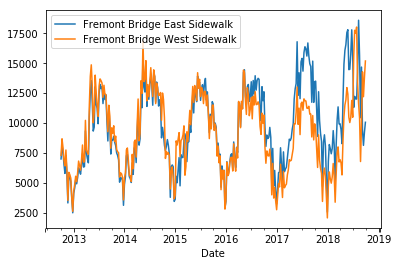

In [22]:
data.resample('W').sum().plot()
import matplot.pyplot as plt


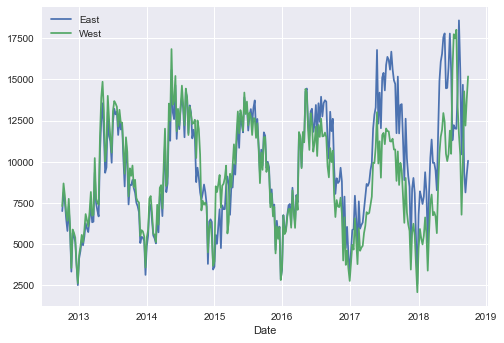

In [31]:

import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ['East', 'West']
data.resample('W').sum().plot();

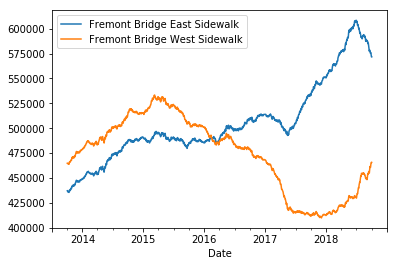

In [27]:
data.resample('D').sum().rolling(365).sum().plot()

(0, 1080850.45)

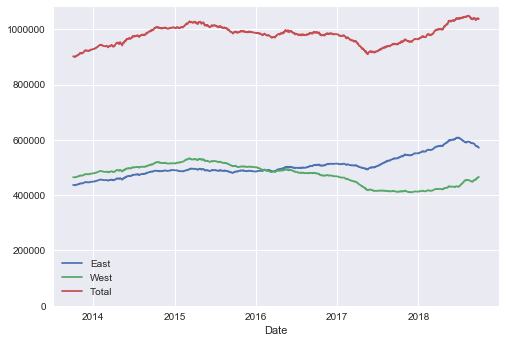

In [37]:
# Let's look at the total traffic 
# We can add columns to the dataframe
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) #0 to None (curent maximum)


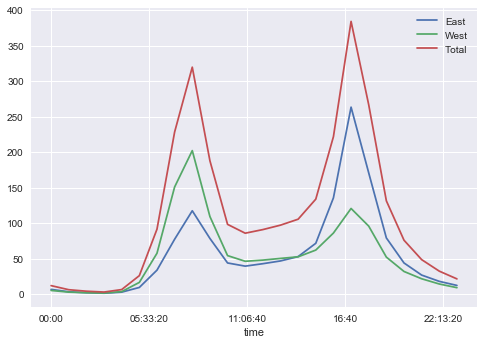

In [38]:

# trend within individual days
# group by time of day, take the mean over all years, and plot
data.groupby(data.index.time).mean().plot()

# interesting trends!
# East side peaks in the morning
# West side peaks in the afternoon
# looks like a commute pattern

In [39]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


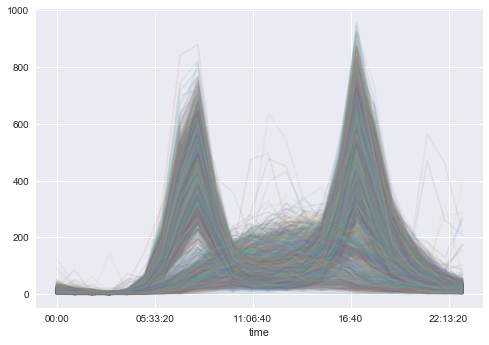

In [45]:
pivoted.plot(legend=False, alpha=0.1)

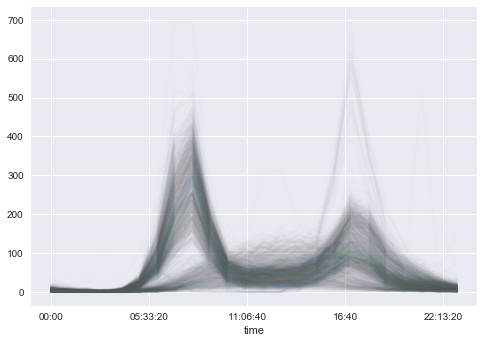

In [46]:
pivoted_West = data.pivot_table('West', index = data.index.time, columns=data.index.date)
pivoted_West.plot(legend=False, alpha=0.01)
# West still peaks in afternoon

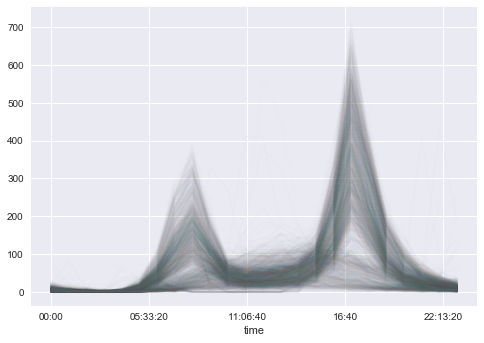

In [49]:
pivoted_East = data.pivot_table('East', index = data.index.time, columns=data.index.date)
pivoted_East.plot(legend=False, alpha=0.01)
